### Plot the dynamic spectra from the several spacecrafts and ground stations (Wind, STEREO, PSP, LOFAR)

In [3]:
import sys
sys.path.insert(1, '../') # make sure to use the code in this repo
import glob
import json
import os
os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'
from spacepy import pycdf
from scipy.signal import find_peaks
import requests
import datetime
from datetime import time
import matplotlib.pyplot as plt
import numpy as np
# Set print options to display in fixed-point notation
#np.set_printoptions(formatter={'float_kind': '{:.4f}'.format})
import pandas as pd
import astropy.io.fits as fits
import scipy
from matplotlib.dates import DateFormatter
myFmt_date = DateFormatter('%Y/%m/%d')
myFmt_time = DateFormatter('%H:%M')
import matplotlib.dates as mdates
import pytz
import matplotlib.dates as dates
# try to use the precise epoch
import matplotlib as mpl
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass
import pyspedas
from pytplot import tplot
from pytplot import options
from pytplot import get_data
import detectRadioburst_ver2 as drb
import radioTools_ver2 as rt
from skimage.transform import probabilistic_hough_line
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
%load_ext autoreload
%autoreload 2

/home/mnedal/.conda/envs/psp/lib/python3.9/site-packages/spacepy/time.py:2365: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [4]:
YEAR = '2019'
MONTH = '04'
DAY = '03'
SASID_LBA = 'L700169'
SASID_HBA = ''

psp_hfr_dir = '/home/mnedal/ASTRON/PSP/DATA/hfr/'
psp_lfr_dir = '/home/mnedal/ASTRON/PSP/DATA/lfr/'
solo_dir = '/home/mnedal/ASTRON/SolO/DATA/'
lofar_dir = '/home/mnedal/ASTRON/LOFAR/DATA/'
wind_dir = '/home/mnedal/ASTRON/Wind/DATA/'
stereo_dir = '/home/mnedal/ASTRON/STEREO/DATA/'

time_range = [f'{YEAR}-{MONTH}-{DAY}', f'{YEAR}-{MONTH}-{DAY}']

### Wind/WAVES 

In [5]:
wind_vars = pyspedas.wind.waves(trange=time_range)

RAD2_times, RAD2_int, RAD2_freq = get_data('E_VOLTAGE_RAD2')
RAD1_times, RAD1_int, RAD1_freq = get_data('E_VOLTAGE_RAD1')
TNR_times, TNR_int, TNR_freq = get_data('E_VOLTAGE_TNR')

29-Sep-23 23:06:25: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/waves/wav_h1/2019/
29-Sep-23 23:06:26: File is current: wind_data/waves/wav_h1/2019/wi_h1_wav_20190403_v01.cdf


**Thermal Noise Receiver (TNR)**
- Inputs: Ex, Ey, or Ez
- Frequency range: 4 kHz - 256 kHz
- No. channels: 32 or 16 per band (5 bands)
- Bandwidth: 400 Hz - 6.4 kHz
- Sensitivity: 7 nV/sqrt(Hz)

**Radio Receiver Band 1 (RAD1)**
- Inputs: Ex+Ez, Ez
- Frequency range: 20 kHz - 1,040 kHz
- No. channels: 256
- Bandwidth: 3 kHz
- Sensitivity: 7 nV/sqrt(Hz)

**Radio Receiver Band 2 (RAD2)**
- Inputs: Ey+Ez, Ez
- Frequency range: 1.075 MHz - 13.825 MHz
- No. channels: 256
- Bandwidth: 20 kHz
- Sensitivity: 7 nV/sqrt(Hz)

[More info](https://spdf.gsfc.nasa.gov/pub/data/stereo/documents/websites/solar-radio/wind/instrument.html)

In [6]:
wind_freq = np.concatenate((TNR_freq, RAD1_freq, RAD2_freq))
wind_data = np.concatenate((TNR_int, RAD1_int, RAD2_int), axis=1)

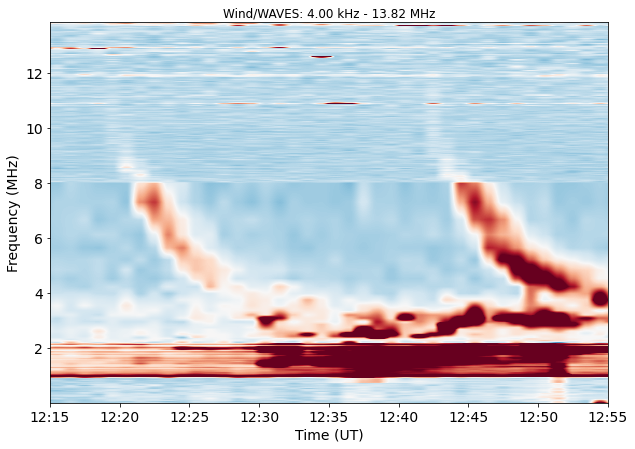

In [7]:
fig = plt.figure(figsize=[10,7])
ax = plt.gca()
ax.imshow(wind_data.T, aspect='auto', origin='lower', 
               #vmin=(np.mean(wind_data)-2 * np.std(RAD2_int)), 
               #vmax=(np.mean(wind_data)+3 * np.std(RAD2_int)), 
               vmin=0.85, vmax=1.4, 
               extent=[dates.date2num(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[0], '%Y-%m-%d %H:%M:%S.%f')), 
                       dates.date2num(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[-1], '%Y-%m-%d %H:%M:%S.%f')), 
                       wind_freq[0]/1e3, wind_freq[-1]/1e3
                      ], cmap='RdBu_r')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(f'Wind/WAVES: {wind_freq[0]:.2f} kHz - {wind_freq[-1]/1e3:.2f} MHz')
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:55'))
plt.show()

In [8]:
print(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[0],  '%Y-%m-%d %H:%M:%S.%f'))
print(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[1],  '%Y-%m-%d %H:%M:%S.%f'))
print(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[2],  '%Y-%m-%d %H:%M:%S.%f'))
print(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[3],  '%Y-%m-%d %H:%M:%S.%f'))

2019-04-03 00:00:30
2019-04-03 00:01:30
2019-04-03 00:02:30
2019-04-03 00:03:30


### STEREO/SWAVES 

In [9]:
# get the data file
try:
    URL = 'https://spdf.gsfc.nasa.gov/pub/data/stereo/combined/swaves/level2_cdf/'+YEAR+'/stereo_level2_swaves_'+YEAR+MONTH+DAY+'_v01.cdf'
    response = requests.get(URL)
    open(os.path.join(stereo_dir, '/stereo_level2_swaves_'+YEAR+MONTH+DAY+'_v01.cdf'), 'wb').write(response.content)
except:
    pass

# read the data values
cdf_stereo = pycdf.CDF('/home/mnedal/ASTRON/STEREO/DATA/stereo_level2_swaves_20190403_v01.cdf')
time_ste = np.array(cdf_stereo.get('Epoch'))
freq_ste = np.array(cdf_stereo.get('frequency'))
data_ste_A = np.array(cdf_stereo.get('avg_intens_ahead'))

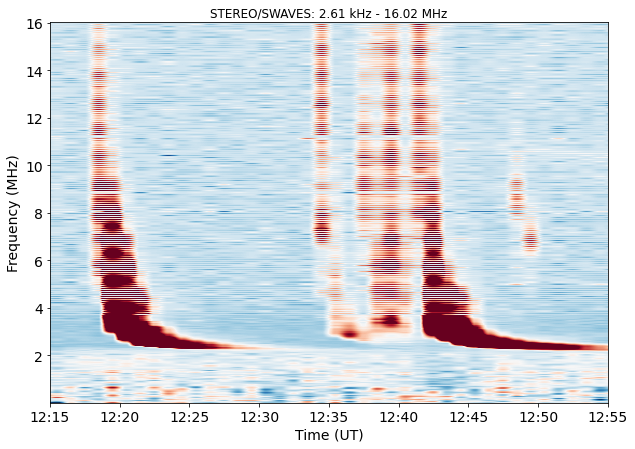

In [11]:
# subtract the Mean value 
# calculate the mean intensity in each row (freq channel) 
df_ste_A = pd.DataFrame(data_ste_A.T)
df_ste_mean = df_ste_A.mean(axis=1)

# subtract that mean value from each corresponding row 
data_ste_A = df_ste_A.sub(df_ste_mean, axis=0)

plt.figure(figsize=[10,7])
plt.imshow(data_ste_A, aspect='auto', origin='lower', 
            vmin=(data_ste_A.mean().mean()-2 * data_ste_A.std().std()), 
            vmax=(data_ste_A.mean().mean()+3 * data_ste_A.std().std()), 
            extent=[dates.date2num(time_ste[0]), dates.date2num(time_ste[-1]), 
                    freq_ste[0]/1e3, freq_ste[-1]/1e3], 
            cmap='RdBu_r')
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title(f'STEREO/SWAVES: {freq_ste[0]:.2f} kHz - {freq_ste[-1]/1e3:.2f} MHz')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:55'))
plt.show()

----------- 

### PSP/FIELD 

In [12]:
# load the PSP data
cdf_psp_hfr = pycdf.CDF(os.path.join(psp_hfr_dir, 'psp_fld_l2_rfs_hfr_'+YEAR+MONTH+DAY+'_v02.cdf'))
cdf_psp_lfr = pycdf.CDF(os.path.join(psp_lfr_dir, 'psp_fld_l2_rfs_lfr_'+YEAR+MONTH+DAY+'_v02.cdf'))

tmin_lfr = cdf_psp_lfr['epoch_lfr'].meta['SCALEMIN']
tmax_lfr = cdf_psp_lfr['epoch_lfr'].meta['SCALEMAX']

# convert pixels values to dB, z-axis
arr_lfr = np.array(cdf_psp_lfr.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'))

# the min power scaled power spectral density (PSD) of 1e-16 is used as a threshold according to Pulupa et al. 2020, https://doi.org/10.3847/1538-4365/ab5dc0 
# more info: https://en.wikipedia.org/wiki/Decibel
Lp_lfr = 10*np.log10(arr_lfr/10**-16)

# x-axis
tm_lfr = np.array(cdf_psp_lfr.get('epoch_lfr'))

# y-axis
freq_lfr = np.array(cdf_psp_lfr.get('frequency_lfr_auto_averages_ch0_V1V2'))/10**6

tmin_hfr = cdf_psp_hfr['epoch_hfr'].meta['SCALEMIN']
tmax_hfr = cdf_psp_hfr['epoch_hfr'].meta['SCALEMAX']

# convert pixels values to dB, z-axis
arr_hfr = np.array(cdf_psp_hfr.get('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2'))
Lp_hfr = 10 * np.log10(arr_hfr/10**-16)

# x-axis
tm_hfr = np.array(cdf_psp_hfr.get('epoch_hfr'))

# y-axis
freq_hfr = np.array(cdf_psp_hfr.get('frequency_hfr_auto_averages_ch0_V1V2'))/10**6

# clean the dyspec by subtracting the Mean intensity from each freq channel
df_psp_hfr = pd.DataFrame(Lp_hfr.T)
df_psp_lfr = pd.DataFrame(Lp_lfr.T)

df_psp_hfr_mean = df_psp_hfr.mean(axis=1)
df_psp_lfr_mean = df_psp_lfr.mean(axis=1)

# subtract that mean value from each corresponding row
df_psp_hfr = df_psp_hfr.sub(df_psp_hfr_mean, axis=0)
df_psp_lfr = df_psp_lfr.sub(df_psp_hfr_mean, axis=0)

In [13]:
# concat the 2 arrays of both bands
df_lfr = pd.DataFrame(df_psp_lfr)
df_lfr.insert(loc=0, column='frequency', value=freq_lfr[1])
df_lfr.set_index(['frequency'], inplace=True)

df_hfr = pd.DataFrame(df_psp_hfr)
df_hfr.insert(loc=0, column='frequency', value=freq_hfr[1])
df_hfr.set_index(['frequency'], inplace=True)

# drop the overlapped rows, take only the first row of the duplicated group
df_psp = pd.concat([df_lfr, df_hfr])
df_psp = df_psp.sort_index(axis=0)
df_psp = df_psp[~df_psp.index.duplicated(keep='first')]

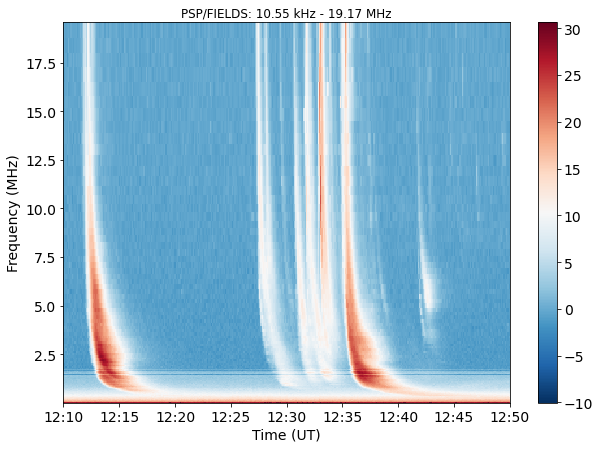

In [14]:
plt.figure(figsize=[10,7])
plt.pcolormesh(tm_lfr, df_psp.index, df_psp.values, 
               vmin=(np.mean(df_psp.values)-2 * np.std(df_psp.values)), 
               vmax=(np.mean(df_psp.values)+3 * np.std(df_psp.values)), 
               cmap='RdBu_r')
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title(f'PSP/FIELDS: {df_psp.index[0]*1e3:.2f} kHz - {df_psp.index[-1]:.2f} MHz')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:50'))
#plt.yscale('log')
plt.colorbar()
plt.show()

---

### LOFAR 

In [15]:
# === LBA ===
# load the data files
lofar_LBA_fits = glob.glob(lofar_dir + '{}_{}{}{}_LBA'.format(SASID_LBA, YEAR, MONTH, DAY) + '/LOFAR_{}{}{}_*.fits'.format(YEAR, MONTH, DAY))
try:
    lofar_LBA_fits.remove(lofar_dir + '{}_{}{}{}_LBA'.format(SASID_LBA, YEAR, MONTH, DAY) + '/LOFAR_{}{}{}_LBA_OUTER.fits'.format(YEAR, MONTH, DAY))
except:
    pass
lofar_LBA_fits.sort()

# load the json files
lofar_LBA_json = glob.glob(lofar_dir + '{}_{}{}{}_LBA'.format(SASID_LBA, YEAR, MONTH, DAY) + '/LOFAR_{}{}{}_*.json'.format(YEAR, MONTH, DAY))
try:
    lofar_LBA_json.remove(lofar_dir + '{}_{}{}{}_LBA'.format(SASID_LBA, YEAR, MONTH, DAY) + '/LOFAR_{}{}{}_LBA_OUTER.json'.format(YEAR, MONTH, DAY))
except:
    pass
lofar_LBA_json.sort()

LBA_json = []
for file in lofar_LBA_json:
    f = open(file)
    LBA_json.append(json.load(f))
    f.close()

In [17]:
# define the FREQ axis
LBA_list = []
LBA_freq = fits.open(lofar_LBA_fits[0])[1].data['FREQ']

for i in range(len(lofar_LBA_fits)):
    
    # read the file
    tmp = fits.open(lofar_LBA_fits[i])
    df = pd.DataFrame(tmp[0].data)
    
    # insert the datetimes as index
    df.insert(loc=0, column='DateTime', value=tmp[2].data['TIME'])
    df.set_index(['DateTime'], inplace=True)
    
    # store the spectra
    LBA_list.append(df)

# Concat. the list based on time index
df_concat_LBA = pd.concat(LBA_list, axis=0)

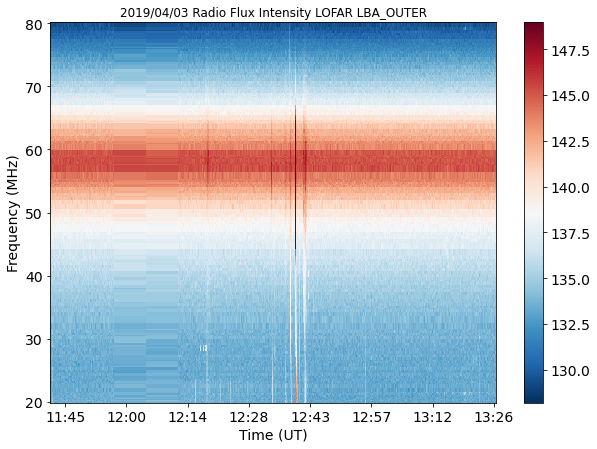

In [18]:
plt.figure(figsize=[10,7])
plt.pcolormesh(df_concat_LBA.index, LBA_freq, df_concat_LBA.values.T, 
            vmin=(np.mean(df_concat_LBA.values)-2 * np.std(df_concat_LBA.values)),
            vmax=(np.mean(df_concat_LBA.values)+3 * np.std(df_concat_LBA.values)),
            cmap='RdBu_r')
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title(fits.open(lofar_LBA_fits[0])[0].header['CONTENT'])
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.colorbar()
plt.show()

In [19]:
# const background removal and gaussian smooth
dyspec_lofar_lba = df_concat_LBA.copy()
gauss_sigma = 1.5
lofar_lba_new_tmp = dyspec_lofar_lba - np.tile(np.mean(dyspec_lofar_lba,0), (dyspec_lofar_lba.shape[0],1))    
lofar_lba_new = scipy.ndimage.gaussian_filter(lofar_lba_new_tmp, gauss_sigma, order=0, output=None, cval=0.0, truncate=5.0, mode='nearest')

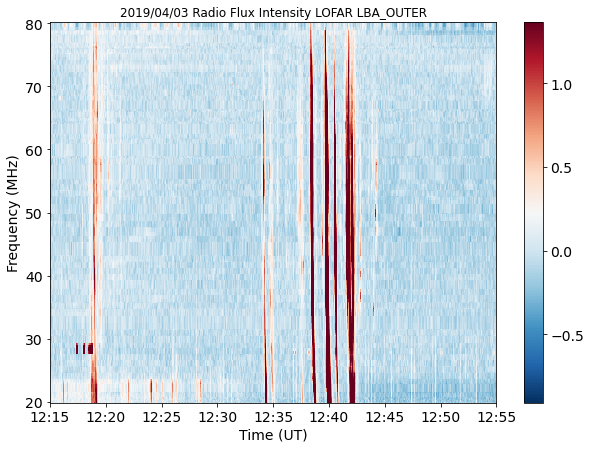

In [20]:
plt.figure(figsize=[10,7])
plt.pcolormesh(df_concat_LBA.index, LBA_freq, lofar_lba_new.T, 
            vmin=(np.mean(lofar_lba_new)-2 * np.std(lofar_lba_new)),
            vmax=(np.mean(lofar_lba_new)+3 * np.std(lofar_lba_new)),
            cmap='RdBu_r')
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.colorbar()
plt.title(fits.open(lofar_LBA_fits[0])[0].header['CONTENT'])
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:55'))
plt.show()

In [21]:
def nearest(items, pivot):
    '''
    This function returns the datetime in items which is the closest to the date pivot.
    '''
    found = min(items, key=lambda x: abs(x - pivot))
    return found

In [22]:
df_concat_LBA.index = dates.num2date(df_concat_LBA.index)

start_pivot = datetime.datetime(2019, 4, 3, 12, 10, tzinfo=df_concat_LBA.index[0].tz)
end_pivot = datetime.datetime(2019, 4, 3, 12, 50, tzinfo=df_concat_LBA.index[0].tz)

st_lof_lba = nearest(df_concat_LBA.index, start_pivot)
et_lof_lba = nearest(df_concat_LBA.index, end_pivot)

st_idx_lofar_lba = np.where(df_concat_LBA.index==st_lof_lba)[0][0]
et_idx_lofar_lba = np.where(df_concat_LBA.index==et_lof_lba)[0][0]

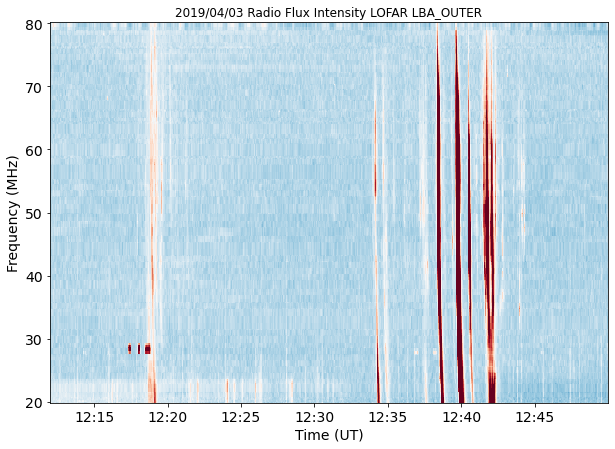

In [23]:
plt.figure(figsize=[10,7])
plt.pcolormesh(df_concat_LBA.index[st_idx_lofar_lba:et_idx_lofar_lba], 
            LBA_freq, 
            lofar_lba_new[st_idx_lofar_lba:et_idx_lofar_lba].T, 
            vmin=(np.mean(lofar_lba_new[st_idx_lofar_lba:et_idx_lofar_lba])-2 * np.std(lofar_lba_new[st_idx_lofar_lba:et_idx_lofar_lba])), 
            vmax=(np.mean(lofar_lba_new[st_idx_lofar_lba:et_idx_lofar_lba])+3 * np.std(lofar_lba_new[st_idx_lofar_lba:et_idx_lofar_lba])), 
            cmap='RdBu_r')
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title(fits.open(lofar_LBA_fits[0])[0].header['CONTENT'])
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.show()

In [24]:
# set the same time zone as LOFAR for the PSP datetimes as well
try:
    tm_lfr = [pytz.timezone('utc').localize(i) for i in tm_lfr]
except:
    pass

st_psp = nearest(tm_lfr, start_pivot)
et_psp = nearest(tm_lfr, end_pivot)

st_idx_psp = next((i for i, j in enumerate(tm_lfr) if j == st_psp), None)
et_idx_psp = next((i for i, j in enumerate(tm_lfr) if j == et_psp), None)

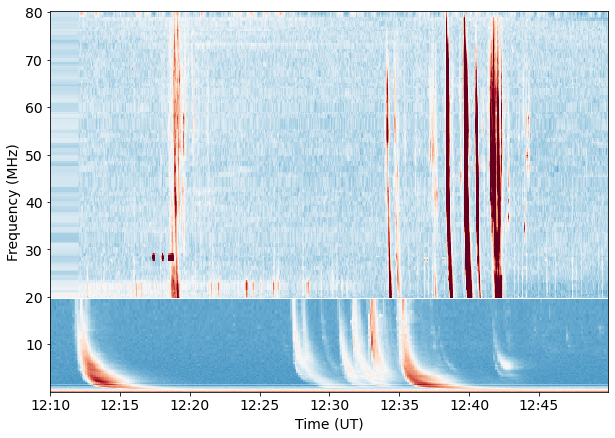

In [25]:
plt.figure(figsize=[10,7])

plt.pcolormesh(df_concat_LBA.index, LBA_freq, lofar_lba_new.T, 
                vmin=(np.mean(lofar_lba_new)-2 * np.std(lofar_lba_new)), 
                vmax=(np.mean(lofar_lba_new)+3 * np.std(lofar_lba_new)), 
                cmap='RdBu_r')

plt.pcolormesh(tm_lfr, df_psp.index, df_psp.values, 
                vmin=(np.mean(df_psp.values)-2 * np.std(df_psp.values)), 
                vmax=(np.mean(df_psp.values)+3 * np.std(df_psp.values)), 
                cmap='RdBu_r')

plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=st_psp, right=et_psp)
plt.show()

In [26]:
# check cadence
lof_cadence = round((df_concat_LBA.index[1] - df_concat_LBA.index[0]).seconds + (df_concat_LBA.index[1] - df_concat_LBA.index[0]).microseconds/1e6)
psp_cadence = round((tm_lfr[1] - tm_lfr[0]).seconds + (tm_lfr[1] - tm_lfr[0]).microseconds/1e6)
lof_cadence, psp_cadence

(1, 7)

In [27]:
# resample LOFAR wrt PSP
df_lof_lba = pd.DataFrame(lofar_lba_new)
df_lof_lba.insert(loc=0, column='DateTime', value=df_concat_LBA.index)
df_lof_lba.set_index(['DateTime'], inplace=True)

resamp_lofar_lba = df_lof_lba.resample(str(psp_cadence)+'S').sum()

In [30]:
psp_data = df_psp.values
psp_freq = df_psp.index.values
psp_time = tm_lfr.copy()

psp_struct = pd.DataFrame(psp_data.T)
psp_struct.insert(loc=0, column='DateTime', value=tm_lfr)
psp_struct.set_index(['DateTime'], inplace=True)

Time travel for radio waves
----------------------------
For PSP: `86.54` light seconds, or `1.44` light minutes.

For Earth: `498.91` light seconds, or `8.32` light minutes.

In [34]:
# shift PSP wrt LOFAR
psp_shift = psp_struct.shift(periods=59, fill_value=0)

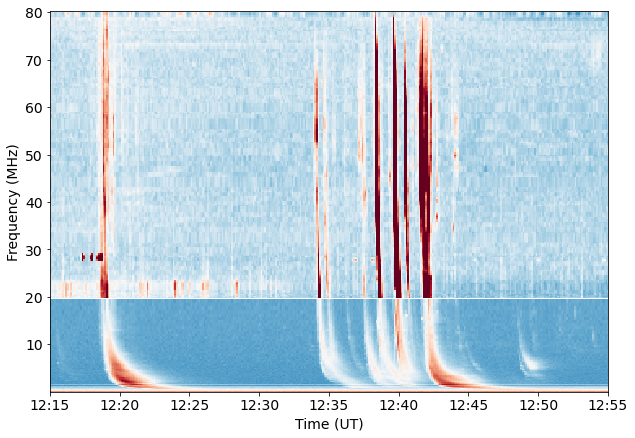

In [35]:
# After resampling and shifting
plt.figure(figsize=[10,7])

plt.pcolormesh(resamp_lofar_lba.index, LBA_freq, resamp_lofar_lba.values.T, 
                vmin=(np.mean(resamp_lofar_lba.values)-2 * np.std(resamp_lofar_lba.values)), 
                vmax=(np.mean(resamp_lofar_lba.values)+3 * np.std(resamp_lofar_lba.values)), 
                cmap='RdBu_r')

plt.pcolormesh(psp_shift.index, psp_freq, psp_shift.values.T, 
                vmin=(np.mean(psp_shift.values)-2 * np.std(psp_shift.values)), 
                vmax=(np.mean(psp_shift.values)+3 * np.std(psp_shift.values)), 
                cmap='RdBu_r')

plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:55'))
plt.show()

In [36]:
sub1_tm_lof = nearest(resamp_lofar_lba.index, start_pivot)
sub2_tm_lof = nearest(resamp_lofar_lba.index, end_pivot)

subset1_lof = resamp_lofar_lba.index.get_loc(sub1_tm_lof)
subset2_lof = resamp_lofar_lba.index.get_loc(sub2_tm_lof)

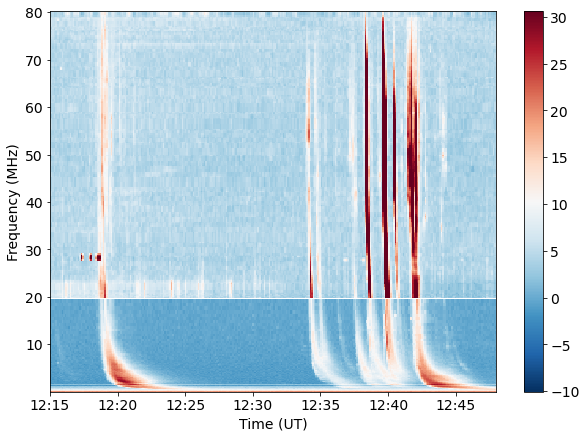

In [37]:
# After resampling and shifting
plt.figure(figsize=[10,7])

plt.pcolormesh(resamp_lofar_lba.index[subset1_lof:subset2_lof], LBA_freq, resamp_lofar_lba.values[subset1_lof:subset2_lof].T, 
                vmin=(np.mean(resamp_lofar_lba.values[subset1_lof:subset2_lof])-2 * np.std(resamp_lofar_lba.values[subset1_lof:subset2_lof])), 
                vmax=(np.mean(resamp_lofar_lba.values[subset1_lof:subset2_lof])+3 * np.std(resamp_lofar_lba.values[subset1_lof:subset2_lof])), 
                cmap='RdBu_r')

plt.pcolormesh(psp_shift[st_idx_psp:et_idx_psp].index, 
                psp_freq, 
                psp_shift[st_idx_psp:et_idx_psp].values.T, 
                vmin=(np.mean(psp_shift.values)-2 * np.std(psp_shift.values)), 
                vmax=(np.mean(psp_shift.values)+3 * np.std(psp_shift.values)), 
                cmap='RdBu_r')

plt.colorbar()
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:48'))
plt.show()

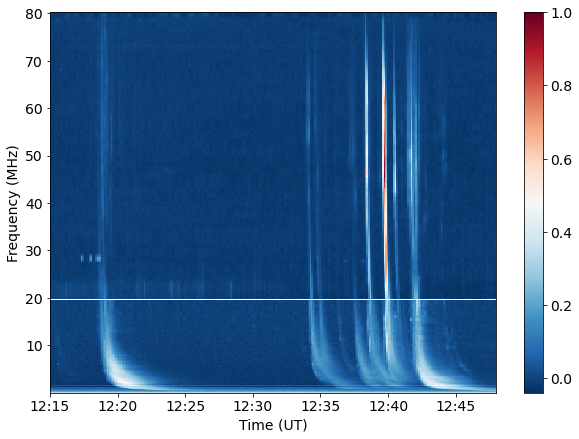

In [38]:
# Normalizing LOFAR and PSP data
plt.figure(figsize=[10,7])

plt.pcolormesh(resamp_lofar_lba.index[subset1_lof:subset2_lof], LBA_freq, resamp_lofar_lba.values[subset1_lof:subset2_lof].T/np.max(resamp_lofar_lba.values[subset1_lof:subset2_lof]), 
                cmap='RdBu_r')

plt.pcolormesh(psp_shift[st_idx_psp:et_idx_psp].index, 
                psp_freq, 
                psp_shift[st_idx_psp:et_idx_psp].values.T/np.max(psp_shift[st_idx_psp:et_idx_psp].values), 
                cmap='RdBu_r')

plt.colorbar()
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:48'))
plt.show()

In [39]:
### === LOFAR LBA =======

# define dataframe
df_LOFAR_LBA = pd.DataFrame(resamp_lofar_lba.values[subset1_lof:subset2_lof])

# define time
df_LOFAR_LBA.insert(loc=0, column='DateTime', value=resamp_lofar_lba.index[subset1_lof:subset2_lof])
df_LOFAR_LBA.set_index(['DateTime'], inplace=True)

# define freq
df_LOFAR_LBA.columns = LBA_freq.copy()

In [40]:
### === PSP HFR + LFR =======

# define dataframe
df_PSP = pd.DataFrame(psp_shift[st_idx_psp:et_idx_psp].values)

# define time
df_PSP.insert(loc=0, column='DateTime', value=psp_shift[st_idx_psp:et_idx_psp].index)
df_PSP.set_index(['DateTime'], inplace=True)

# define freq
df_PSP.columns = psp_freq.copy()

In [41]:
total_freq = np.concatenate([df_PSP.columns, df_LOFAR_LBA.columns])
finool = np.concatenate([df_PSP.values, df_LOFAR_LBA.values], axis=1)

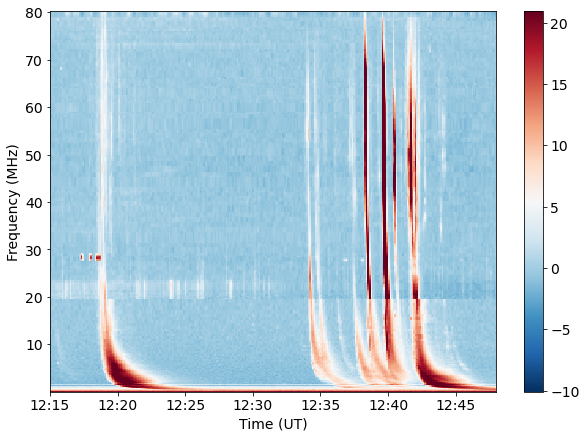

In [42]:
plt.figure(figsize=[10,7])

plt.pcolormesh(df_PSP.index, total_freq, finool.T, 
            vmin=(np.mean(finool)-2 * np.std(finool)), 
            vmax=(np.mean(finool)+3 * np.std(finool)), 
            cmap='RdBu_r')

plt.colorbar()
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:15'), right=pd.Timestamp('2019-04-03 12:48'))
plt.show()

### All the dynamic spectra together

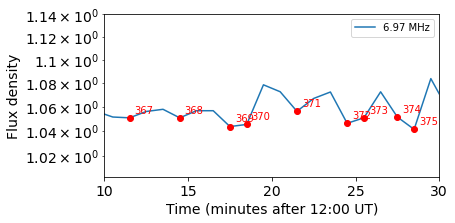

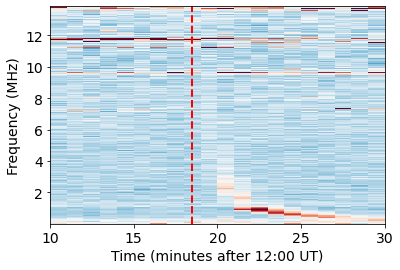

In [43]:
# get the lightcurve at 7 MHz from Wind data
freq_idx = np.where(wind_freq==nearest(wind_freq, 7e3))[0][0]

# Convert 'wind_time' to a list of datetime objects
wind_time = [dates.date2num(datetime.datetime.strptime(t,'%Y-%m-%d %H:%M:%S.%f')) for t in pyspedas.time_string(TNR_times)]

# Calculate the second derivative of the data
data_derivative = np.gradient(np.gradient(wind_data[:, freq_idx]))

# Find the indices where the second derivative becomes positive
increasing_slope_indices = np.where(data_derivative > 0)[0]

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

ax.plot(wind_time, wind_data[:, freq_idx], label=f'{wind_freq[freq_idx]/1e3:.2f} MHz')
ax.plot_date(np.array(wind_time)[increasing_slope_indices], wind_data[increasing_slope_indices, freq_idx], 'ro')

# Annotate the points with index numbers
for idx, point_time in enumerate(np.array(wind_time)[increasing_slope_indices]):
    ax.annotate(str(idx), xy=(point_time, wind_data[increasing_slope_indices[idx], freq_idx]),
                xytext=(5, 5), textcoords='offset points', color='r')

ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Flux density')
ax.xaxis.set_major_formatter(dates.DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

# Find the time index of a peak number
wind_peak_time_index = increasing_slope_indices[370]

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)

ax.pcolormesh(wind_time, wind_freq/1e3, wind_data.T, 
              vmin=0.9, vmax=1.3, cmap='RdBu_r')
ax.axvline(x=wind_time[wind_peak_time_index], color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

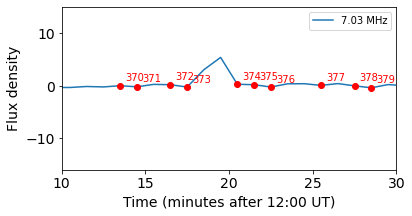

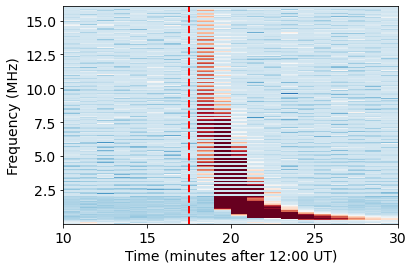

In [44]:
# get the lightcurve at 7 MHz from STEREO data
freq_idx = np.where(freq_ste==nearest(freq_ste, 7.01e3))[0][0]
ste_time = dates.date2num(time_ste)
ste_data = data_ste_A.T.values

# Calculate the second derivative of the data
data_derivative = np.gradient(np.gradient(ste_data[:, freq_idx]))

# Find the indices where the second derivative becomes positive
increasing_slope_indices = np.where(data_derivative > 0)[0]

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

ax.plot(ste_time, ste_data[:, freq_idx], label=f'{freq_ste[freq_idx]/1e3:.2f} MHz')
ax.plot_date(np.array(ste_time)[increasing_slope_indices], ste_data[increasing_slope_indices, freq_idx], 'ro')

# Annotate the points with index numbers
for idx, point_time in enumerate(np.array(ste_time)[increasing_slope_indices]):
    ax.annotate(str(idx), xy=(point_time, ste_data[increasing_slope_indices[idx], freq_idx]),
                xytext=(5, 5), textcoords='offset points', color='r')

ax.legend()
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Flux density')
ax.xaxis.set_major_formatter(dates.DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

# Find the time index of a peak number
ste_peak_time_index = increasing_slope_indices[373]

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax.pcolormesh(ste_time, freq_ste/1e3, ste_data.T, 
                vmin=(np.mean(ste_data)-2 * np.std(ste_data)),
                vmax=(np.mean(ste_data)+3 * np.std(ste_data)),
                cmap='RdBu_r')
ax.axvline(x=ste_time[ste_peak_time_index], color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

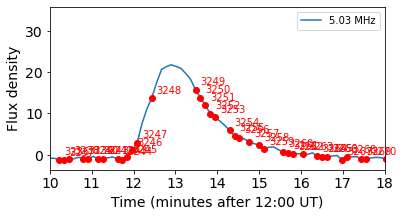

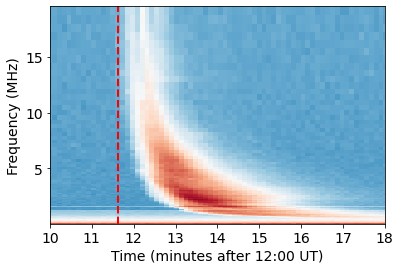

In [45]:
# get the lightcurve at 8 MHz from PSP data
freq_psp = df_psp.index.values
freq_idx = np.where(freq_psp==nearest(freq_psp, 5))[0][0]
psp_time = dates.date2num(tm_lfr)
psp_data = df_psp.values.T

# Calculate the second derivative of the data
data_derivative = np.gradient(np.gradient(psp_data[:, freq_idx]))

# Find the indices where the second derivative becomes positive
increasing_slope_indices = np.where(data_derivative > 0)[0]

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

ax.plot(psp_time, psp_data[:, freq_idx], label=f'{freq_psp[freq_idx]:.2f} MHz')
ax.plot_date(np.array(psp_time)[increasing_slope_indices], psp_data[increasing_slope_indices, freq_idx], 'ro')

# Annotate the points with index numbers
for idx, point_time in enumerate(np.array(psp_time)[increasing_slope_indices]):
    ax.annotate(str(idx), xy=(point_time, psp_data[increasing_slope_indices[idx], freq_idx]),
                xytext=(5, 5), textcoords='offset points', color='r')

ax.legend()
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Flux density')
ax.xaxis.set_major_formatter(dates.DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:18'))
plt.show()

# Find the time index of a peak number
psp_peak_time_index = increasing_slope_indices[3243]

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plt.pcolormesh(psp_time, freq_psp, psp_data.T,
               vmin=(np.mean(psp_data)-2 * np.std(psp_data)), 
               vmax=(np.mean(psp_data)+3 * np.std(psp_data)), 
               cmap='RdBu_r')
ax.axvline(x=psp_time[psp_peak_time_index], color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:18'))
plt.show()

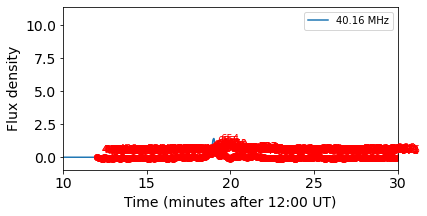

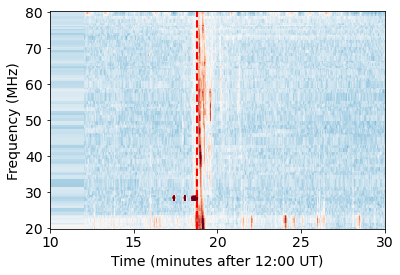

In [46]:
# get the lightcurve at 55 MHz from LOFAR data
freq_idx = np.where(LBA_freq==nearest(LBA_freq, 40))[0][0]
lof_time = dates.date2num(df_concat_LBA.index.values)

# Calculate the second derivative of the data
data_derivative = np.gradient(np.gradient(lofar_lba_new[:, freq_idx]))

# Find the indices where the second derivative becomes positive
increasing_slope_indices = np.where(data_derivative > 0)[0]

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

ax.plot(lof_time, lofar_lba_new[:, freq_idx], label=f'{LBA_freq[freq_idx]:.2f} MHz')
ax.plot_date(np.array(lof_time)[increasing_slope_indices], lofar_lba_new[increasing_slope_indices, freq_idx], 'ro')

# Annotate the points with index numbers
for idx, point_time in enumerate(np.array(lof_time)[increasing_slope_indices]):
    ax.annotate(str(idx), xy=(point_time, lofar_lba_new[increasing_slope_indices[idx], freq_idx]),
                xytext=(5, 5), textcoords='offset points', color='r')

ax.legend()
#ax.set_yscale('log')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Flux density')
ax.xaxis.set_major_formatter(dates.DateFormatter('%M'))
#ax.set_xlim(left=pd.Timestamp('2019-04-03 12:18:40'), right=pd.Timestamp('2019-04-03 12:19:25'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

# Find the time index of a peak number
lof_peak_time_index = increasing_slope_indices[646]

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plt.pcolormesh(lof_time, LBA_freq, lofar_lba_new.T, 
                vmin=(np.mean(lofar_lba_new)-2 * np.std(lofar_lba_new)),
                vmax=(np.mean(lofar_lba_new)+3 * np.std(lofar_lba_new)),
                cmap='RdBu_r')
ax.axvline(x=lof_time[lof_peak_time_index], color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
#ax.set_xlim(left=pd.Timestamp('2019-04-03 12:18:30'), right=pd.Timestamp('2019-04-03 12:19:25'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
plt.show()

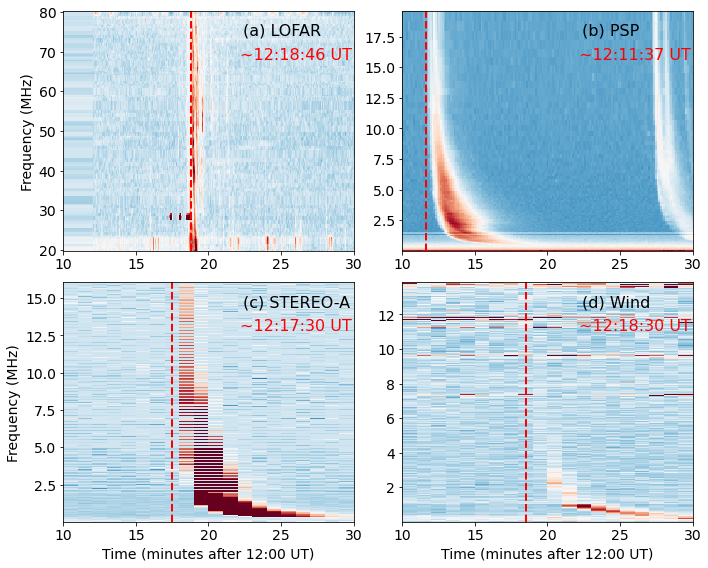

In [47]:
fig = plt.figure(figsize=[10,8])

### LOFAR
ax = fig.add_subplot(221)
ax.pcolormesh(lof_time, LBA_freq, lofar_lba_new.T, 
                vmin=(np.mean(lofar_lba_new)-2 * np.std(lofar_lba_new)),
                vmax=(np.mean(lofar_lba_new)+3 * np.std(lofar_lba_new)),
                cmap='RdBu_r')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(a) LOFAR', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
#start_time = dates.date2num(pd.Timestamp('2019-04-03 12:18:46'))
start_time = lof_time[lof_peak_time_index]
lof_time_without_microseconds = time(dates.num2date(start_time).time().hour,
                                     dates.num2date(start_time).time().minute,
                                     dates.num2date(start_time).time().second)
ax.axvline(x=start_time, color='red', linestyle='dashed', linewidth=2)
ax.annotate(f'~{str(lof_time_without_microseconds)} UT',
            xy=(0.61, 0.8), xycoords='axes fraction', fontsize=16, color='red')


### PSP
ax = fig.add_subplot(222)
plt.pcolormesh(tm_lfr, df_psp.index, df_psp.values, 
               vmin=(np.mean(df_psp.values)-2 * np.std(df_psp.values)), 
               vmax=(np.mean(df_psp.values)+3 * np.std(df_psp.values)), 
               cmap='RdBu_r')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(b) PSP', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
#start_time = dates.date2num(pd.Timestamp('2019-04-03 12:11:50'))
start_time = psp_time[psp_peak_time_index]
psp_time_without_microseconds = time(dates.num2date(start_time).time().hour,
                                     dates.num2date(start_time).time().minute,
                                     dates.num2date(start_time).time().second)
ax.axvline(x=start_time, color='red', linestyle='dashed', linewidth=2)
ax.annotate(f'~{str(psp_time_without_microseconds)} UT',
            xy=(0.61, 0.8), xycoords='axes fraction', fontsize=16, color='red')


### STEREO
ax = fig.add_subplot(223)
ax.pcolormesh(ste_time, freq_ste/1e3, ste_data.T, 
            vmin=(np.mean(ste_data)-2 * np.std(ste_data)),
            vmax=(np.mean(ste_data)+3 * np.std(ste_data)),
            cmap='RdBu_r')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(c) STEREO-A', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
#start_time = dates.date2num(pd.Timestamp('2019-04-03 12:18:00'))
start_time = ste_time[ste_peak_time_index]
ax.axvline(x=start_time, color='red', linestyle='dashed', linewidth=2)
ax.annotate(f'~{str(dates.num2date(start_time).time())} UT',
            xy=(0.61, 0.8), xycoords='axes fraction', fontsize=16, color='red')


### WIND
ax = fig.add_subplot(224)
ax.pcolormesh(wind_time, wind_freq/1e3, wind_data.T, 
              vmin=0.9, vmax=1.3, cmap='RdBu_r')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(d) Wind', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
#start_time = dates.date2num(pd.Timestamp('2019-04-03 12:19:45'))
start_time = wind_time[wind_peak_time_index]
ax.axvline(x=start_time, color='red', linestyle='dashed', linewidth=2)
#ax.annotate(f'~{str(dates.num2date(start_time).time())} UT',
ax.annotate(f'~{str(dates.num2date(start_time).time())} UT',
            xy=(0.61, 0.8), xycoords='axes fraction', fontsize=16, color='red')

plt.tight_layout()
#plt.savefig('/HDD/mnedal/plots/all_dyspec.pdf', format='pdf', bbox_inches='tight')
plt.savefig('/HDD/mnedal/plots/all_dyspec.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

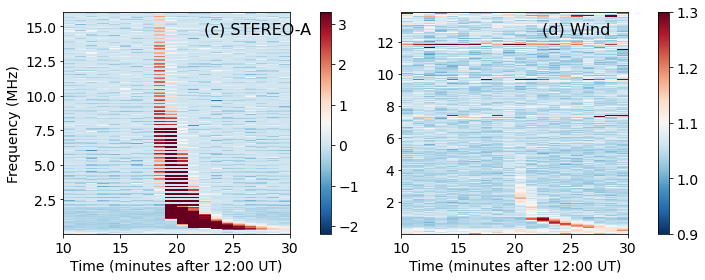

In [48]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_subplot(121)
im = ax.pcolormesh(ste_time, freq_ste/1e3, ste_data.T, 
            vmin=(np.mean(ste_data)-2 * np.std(ste_data)),
            vmax=(np.mean(ste_data)+3 * np.std(ste_data)),
            cmap='RdBu_r')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(c) STEREO-A', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
plt.colorbar(im, pad=0.1)

ax = fig.add_subplot(122)
im = ax.pcolormesh(wind_time, wind_freq/1e3, wind_data.T, 
              vmin=0.9, vmax=1.3, cmap='RdBu_r')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.set_xlim(left=pd.Timestamp('2019-04-03 12:10'), right=pd.Timestamp('2019-04-03 12:30'))
ax.annotate('(d) Wind', xy=(0.62, 0.9), xycoords='axes fraction', fontsize=16, color='black')
plt.colorbar(im, pad=0.1)

plt.tight_layout()
plt.show()

* Let's take a look at a cut of the dynamic spectra of Wind and STA at 700 kHz.
* The code go through the frequencies and return the index of the nearest one (if the exact defined frequency isn't found).

In [51]:
# find the index at which the s/c freq is the closest to the given val
nearest_wind_freq = nearest(wind_freq, 700)
idx_nearest_wind_freq = np.where(wind_freq==nearest_wind_freq)[0][0]

nearest_sta_freq = nearest(freq_ste, 700)
idx_nearest_sta_freq = np.where(freq_ste==nearest_sta_freq)[0][0]

In [52]:
# start time
find_this_date_sta = mdates.date2num(pd.Timestamp('2019-04-03 12:10'))
found_date_sta = nearest(ste_time, find_this_date_sta)
print('Start time index:', np.where(ste_time==found_date_sta)[0][0])

# end time
find_this_date_sta = mdates.date2num(pd.Timestamp('2019-04-03 12:30'))
found_date_sta = nearest(ste_time, find_this_date_sta)
print('End time index:', np.where(ste_time==found_date_sta)[0][0])

Start time index: 730
End time index: 749


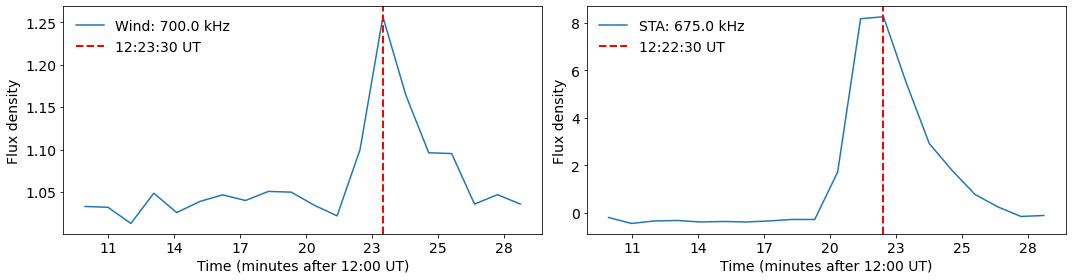

In [94]:
fig = plt.figure(figsize=[15,4])

ax = fig.add_subplot(121)
ax.plot(wind_time[730:750], wind_data[730:750, idx_nearest_wind_freq], label=f'Wind: {wind_freq[idx_nearest_wind_freq]} kHz')
peak_wind_signal = np.argmax(wind_data[730:750, idx_nearest_wind_freq])
ax.axvline(x=wind_time[730:750][peak_wind_signal], color='red', linestyle='dashed', linewidth=2,
           label=f'{mdates.num2date(wind_time[730:750][peak_wind_signal]).time()} UT')
ax.legend(loc='upper left', frameon=False, fontsize=14)
#ax.set_yscale('log')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Flux density')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
#ax.grid()

ax = fig.add_subplot(122)
ax.plot(ste_time[730:750], ste_data[730:750, idx_nearest_sta_freq], label=f'STA: {freq_ste[idx_nearest_sta_freq]} kHz')
peak_sta_signal = np.argmax(ste_data[730:750, idx_nearest_sta_freq])
ax.axvline(x=ste_time[730:750][peak_sta_signal], color='red', linestyle='dashed', linewidth=2,
           label=f'{mdates.num2date(ste_time[730:750][peak_sta_signal]).time()} UT')
ax.legend(loc='upper left', frameon=False, fontsize=14)
#ax.set_yscale('log')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Flux density')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
#ax.grid()

plt.tight_layout()
fig.savefig('/HDD/mnedal/plots/wind_vs_sta_fluxdens.png', dpi=300, format='png', bbox_inches='tight')
fig.savefig('/HDD/mnedal/plots/wind_vs_sta_fluxdens.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [55]:
# determine the start and end times of the burst as 10% of the background
wind_subdata = wind_data[730:750, idx_nearest_wind_freq]
wind_subtime = wind_time[730:750]

sta_subdata = ste_data[730:750, idx_nearest_sta_freq]
sta_subtime = ste_time[730:750]

for i, wval in enumerate(wind_subdata):
    #if wval > np.nanmean(wind_subdata[:7]):
    if wval > np.nanmean(wind_subdata):
        start_burst_wind = (i, wval)
        break

for i, wval in enumerate(wind_subdata[start_burst_wind[0]:]):
    #if wval < np.nanmean(wind_subdata[:7]):
    if wval < np.nanmean(wind_subdata):
        end_burst_wind = (i+start_burst_wind[0], wval)
        break

for i, sval in enumerate(sta_subdata):
    #if sval > 0.1*np.nanmean(sta_subdata[:7]):
    if sval > np.nanmean(sta_subdata):
        start_burst_sta = (i, sval)
        break

for i, sval in enumerate(sta_subdata[start_burst_sta[0]:]):
    #if sval < 0.1*np.nanmean(sta_subdata[:7]):
    if sval < np.nanmean(sta_subdata):
        end_burst_sta = (i+start_burst_sta[0], sval)
        break

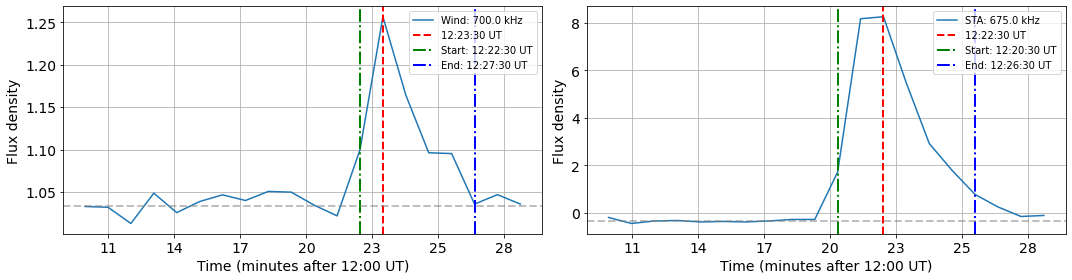

In [62]:
fig = plt.figure(figsize=[15,4])

ax = fig.add_subplot(121)
ax.plot(wind_subtime, wind_subdata, label=f'Wind: {wind_freq[idx_nearest_wind_freq]} kHz')
peak_wind_signal = np.argmax(wind_subdata)
ax.axvline(x=wind_subtime[peak_wind_signal], c='r', ls='--', lw=2,
           label=f'{mdates.num2date(wind_subtime[peak_wind_signal]).time()} UT')
ax.axvline(x=wind_subtime[start_burst_wind[0]], c='g', ls='-.', lw=2,
           label=f'Start: {mdates.num2date(wind_subtime[start_burst_wind[0]]).time()} UT')
ax.axvline(x=wind_subtime[end_burst_wind[0]], c='b', ls='-.', lw=2,
           label=f'End: {mdates.num2date(wind_subtime[end_burst_wind[0]]).time()} UT')
ax.axhline(y=np.nanmean(wind_subdata[:7]), c='gray', ls='--', lw=2, alpha=0.5)
ax.legend(loc='upper right')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Flux density')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.grid()

# ==============================================================

ax = fig.add_subplot(122)
ax.plot(sta_subtime, sta_subdata, label=f'STA: {freq_ste[idx_nearest_sta_freq]} kHz')
peak_sta_signal = np.argmax(sta_subdata)
ax.axvline(x=sta_subtime[peak_sta_signal], c='r', ls='dashed', lw=2,
           label=f'{mdates.num2date(sta_subtime[peak_sta_signal]).time()} UT')
ax.axvline(x=sta_subtime[start_burst_sta[0]], c='g', ls='-.', lw=2,
           label=f'Start: {mdates.num2date(sta_subtime[start_burst_sta[0]]).time()} UT')
ax.axvline(x=sta_subtime[end_burst_sta[0]], c='b', ls='-.', lw=2,
           label=f'End: {mdates.num2date(sta_subtime[end_burst_sta[0]]).time()} UT')
ax.axhline(y=np.nanmean(sta_subdata[:7]), c='gray', ls='--', lw=2, alpha=0.5)
ax.legend(loc='upper right')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Flux density')
ax.set_xlabel('Time (minutes after 12:00 UT)')
ax.xaxis.set_major_formatter(DateFormatter('%M'))
ax.grid()

plt.tight_layout()
plt.show()

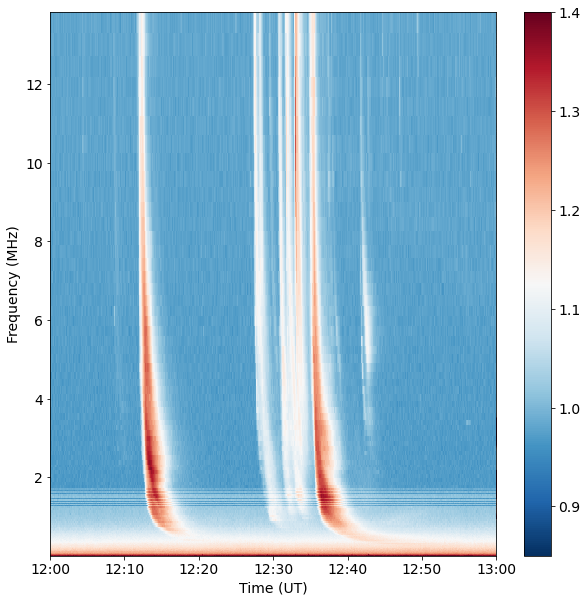

In [63]:
# Normalizing LOFAR and PSP data
plt.figure(figsize=[10,10])

plt.pcolormesh(df_concat_LBA.index, LBA_freq, lofar_lba_new.T, 
            vmin=(np.mean(lofar_lba_new)-2 * np.std(lofar_lba_new)),
            vmax=(np.mean(lofar_lba_new)+3 * np.std(lofar_lba_new)),
            cmap='RdBu_r')

plt.pcolormesh(tm_lfr, df_psp.index, df_psp.values, 
               vmin=(np.mean(df_psp.values)-2 * np.std(df_psp.values)), 
               vmax=(np.mean(df_psp.values)+3 * np.std(df_psp.values)), 
               cmap='RdBu_r')

ax.imshow(data_ste_A, aspect='auto', origin='lower', 
            vmin=(data_ste_A.mean().mean()-2 * data_ste_A.std().std()), 
            vmax=(data_ste_A.mean().mean()+3 * data_ste_A.std().std()), 
            extent=[dates.date2num(time_ste[0]), dates.date2num(time_ste[-1]), 
                    freq_ste[0]/1e3, freq_ste[-1]/1e3], 
            cmap='RdBu_r')

plt.imshow(wind_data.T, aspect='auto', origin='lower', 
               #vmin=(np.mean(wind_data)-2 * np.std(RAD2_int)), 
               #vmax=(np.mean(wind_data)+3 * np.std(RAD2_int)), 
               vmin=0.85, vmax=1.4, 
               extent=[dates.date2num(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[0], '%Y-%m-%d %H:%M:%S.%f')), 
                       dates.date2num(datetime.datetime.strptime(pyspedas.time_string(TNR_times)[-1], '%Y-%m-%d %H:%M:%S.%f')), 
                       wind_freq[0]/1e3, wind_freq[-1]/1e3
                      ], cmap='RdBu_r')

plt.colorbar()
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.gca().xaxis.set_major_formatter(myFmt_time)
plt.xlim(left=pd.Timestamp('2019-04-03 12:00'), right=pd.Timestamp('2019-04-03 13:00'))
plt.show()